### Adding libraries and file 

In [117]:
import pandas as pd
import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

import plotly.graph_objects as go
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.copy()
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Exited' if (x == 1) else 'Loyal')
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Loyal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Loyal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Loyal
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Loyal
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Exited


### Task 9.1

In [88]:
data_91 = churn_data
fig = px.pie(
    data_frame=data_91,
    names='Exited',
    height=500,
    width=700,
    title='Exited customers'
)
fig.show()

### Task 9.2

In [72]:

data_92 = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame=data_92,
    x='Balance',
    nbins=25,
    width=800,
    height=800,
    title='Customers with more than $2 500'
)
#fig.update_xaxes(type='category', categoryorder='category ascending')
fig.show()



### Task 9.3

In [94]:

fig = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Balance',
    color='Exited',
    title='Balance of exited and loyal customers',
    width=600,
    height=600
)
fig.show()

### Task 9.4

In [105]:

display((churn_data['Age'] >= 57).value_counts())

fig = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Age',
    color='Exited',
    title='Age of exited and loyal customers',
    width=600,
    height=600
)
fig.show()

False    9270
True      730
Name: Age, dtype: int64

### Task 9.5

In [161]:
data_95 = churn_data['Exited'] == 'Exited'
data_95l = churn_data['Exited'] == 'Loyal'

data_95 = churn_data[churn_data['Exited'] == 'Exited'].pivot_table(values=['CreditScore', 'EstimatedSalary'], index='CustomerId').sort_values('CreditScore')
data_95l = churn_data[churn_data['Exited'] == 'Loyal'].pivot_table(values=['CreditScore', 'EstimatedSalary'], index='CustomerId').sort_values('CreditScore')
display(data_95)
fig = px.line(
    data_95,
    x='CreditScore',
    y='EstimatedSalary',
    title='Relation between Credit Score and Estimated Salary of exited customers',
    width=1000,
    height=500,    
)
fig.show()
fig = px.line(
    data_95l,
    x='CreditScore',
    y='EstimatedSalary',
    title='Relation between Credit Score and Estimated Salary of customers',
    width=1000,
    height=500,    
)
fig.show()

,CreditScore,EstimatedSalary
CustomerId,,
15765173,350,113796.15
15668309,350,172321.21
15758813,350,123602.11
15803202,350,125823.79
15685372,350,191973.49
...,...,...
15736126,850,83617.17
15733973,850,19632.64
15733247,850,4861.72


### Task 9.6

In [171]:
data_96 = churn_data[churn_data['Exited'] == 'Exited']
fig = px.pie(
    data_frame=data_96,
    names='Gender',
    height=300,
    width=300,
    title='Exited customers'
)
fig.show()

data_96l = churn_data[churn_data['Exited'] == 'Loyal']
fig = px.pie(
    data_frame=data_96l,
    names='Gender',
    height=300,
    width=300,
    title='Loyal customers'
)
fig.show()

### Task 9.7

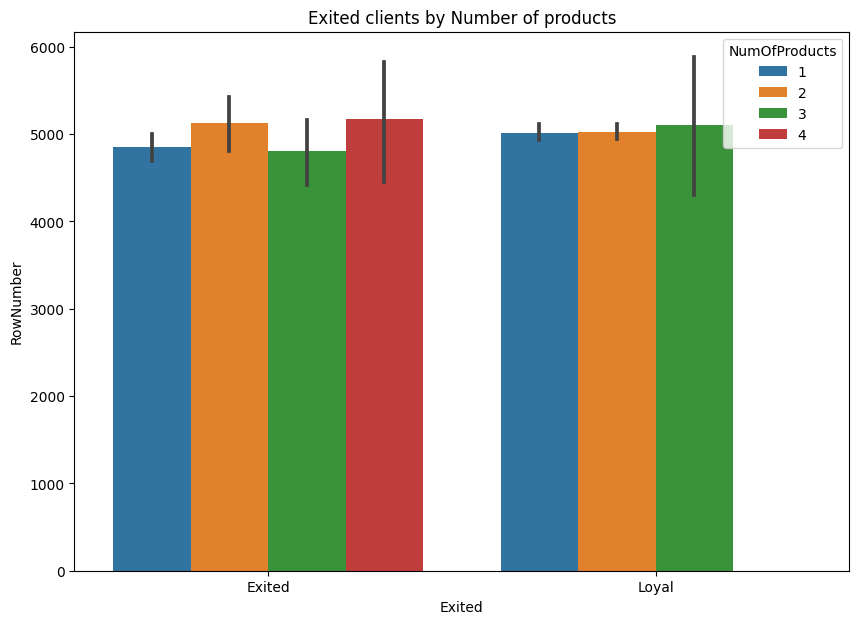

In [175]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
#Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

fig = plt.figure(figsize=(10, 7))
#churn_data['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=churn_data,
    x='Exited',  # По умолчанию метод отображает среднее по столбцу, который указан в параметре x
    y='RowNumber',
    estimator='mean',   # вместо среднего можно вычислить и любую другую статистическую характеристику
    hue='NumOfProducts',
)
barplot.set_title('Exited clients by Number of products');

### Task 9.8

In [ ]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

### Task 9.9

In [ ]:
#9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, 
# которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

### Task 9.10

In [ ]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), 
# которая приведена ниже. Примените её к столбцу CreditScore и 
# создайте новый признак CreditScoreCat — категории кредитного рейтинга.


#Постройте сводную таблицу, строками которой являются категории 
# кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется у
# слугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока 
# (Exited) — доля ушедших пользователей.

#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"